In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from scripts.gestion_donnees.pretraitement import Pretraitement
from scripts.evaluation.evaluation_model import Evaluation
from scripts.classifieurs.forets_aleatoires import Forets_aleatoires
from scripts.classifieurs.reseaux_de_neurones import Reseaux_de_neurones
from scripts.classifieurs.arbre_de_decision import Arbre_de_decision
from scripts.classifieurs.svm import SVM_Classificateur
from scripts.classifieurs.adaboost import AdaBoost_model
from scripts.classifieurs.bagging import Bagging
from scripts.classifieurs.knn import Knn 
from scripts.classifieurs.logistic_regression import LogisticRegression_model
from scripts.classifieurs.perceptron import Perceptron_model
from sklearn.ensemble import RandomForestClassifier

## Partie 1 :  Prétraitement et analyse des données

In [2]:
# creation des instances
Ev = Evaluation
Pt = Pretraitement("./data/train.csv")
#  charger donneés entrainement
df_train_init = Pt.Charger_donnees()
# encoder donneés
etiquette,classes = Pt.Encoder_donnees(df_train_init,"species")
df_train_init = df_train_init.drop(['id','species'], axis=1)
# supprimer les valeurs aberrantes
outliers = Pt.Indice_outliers(df_train_init,3.0)
df_train = df_train_init.drop(outliers)
etiquette = [etiquette[i] for i in range(len(etiquette)) if i not in outliers]
# diviser les donnees
x_train, x_test, y_train, y_test, x_val, y_val = Pt.Diviser_donnees(df_train,etiquette)


In [ ]:
#vérifie la redondance des datas
print("Le nombre de données redondantes de train est " + str(df_train.duplicated().sum()))
#vérifie si pour un des attributs il manque une valeur
print("Nb valeur manquante train " + str(df_train.isnull().any().sum()))
#
unique_elements = set(etiquette)

# Get the count of unique elements
n_classes = len(unique_elements)
print(n_classes)


## Partie 2 : Modélisation et évaluation des données

##### Forets aléatoires

In [ ]:
model_foret_alea = Forets_aleatoires(x_train, y_train, x_val, y_val,x_test,y_test)
model_foret_alea.garder_meilleur_hyperparameters()
model_foret_alea.entrainement()
predictions = model_foret_alea.prediction()

In [ ]:
evaluation= Evaluation(model=model_foret_alea.rf_classifier, x_test=x_test, y_test=y_test, x_train=x_train, y_train=y_train)
f1, precision, recall = evaluation.calculate_metrics(model_foret_alea.y_test, model_foret_alea.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation.plt_roc_curve()
evaluation.plt_confusion_matrix()
evaluation.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation.plot_learning_curves(train_sizes=train_sizes, scoring='accuracy')

##### SVM

In [3]:
svm_model = SVM_Classificateur(x_train, y_train, x_val, y_val, x_test, y_test)
svm_model.validation_croisee_gridsearch()
svm_model.entrainement()
predictions_svm = svm_model.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Meilleurs hyperparamètres: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.7194, Precision: 0.7891, Recall: 0.7254


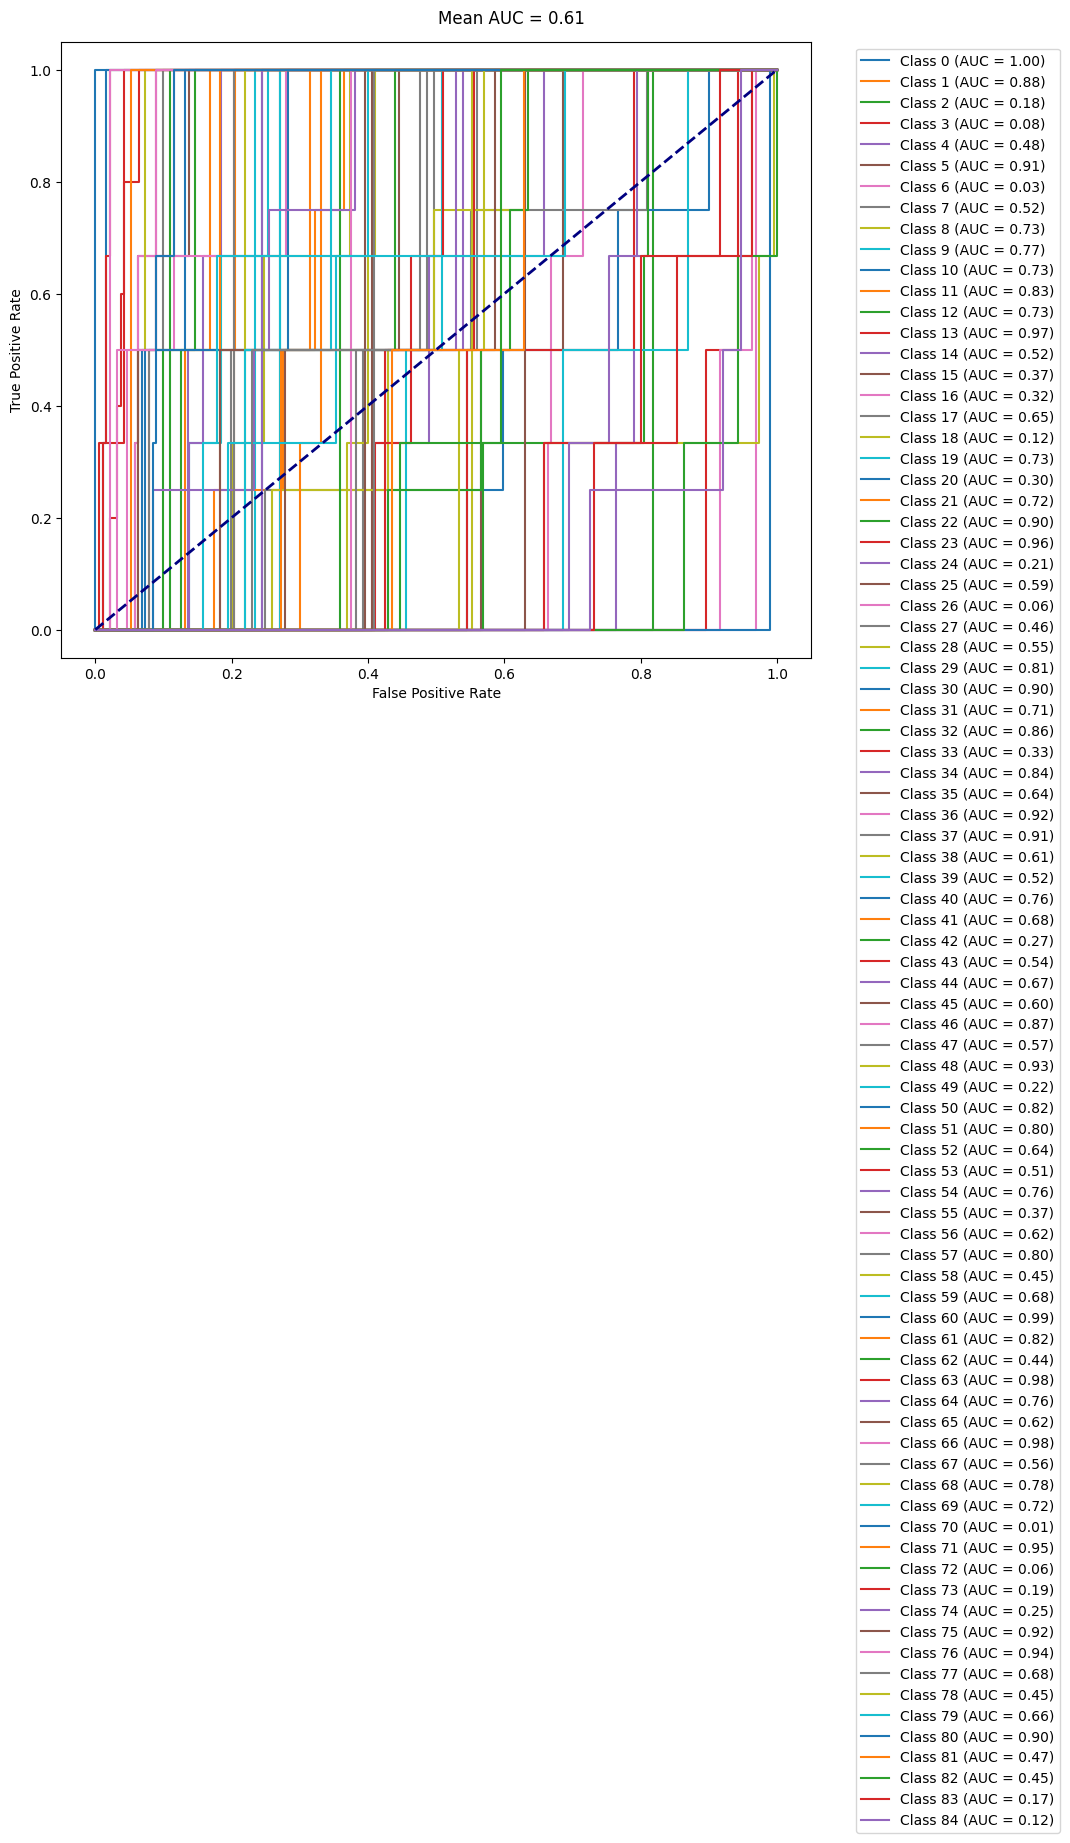

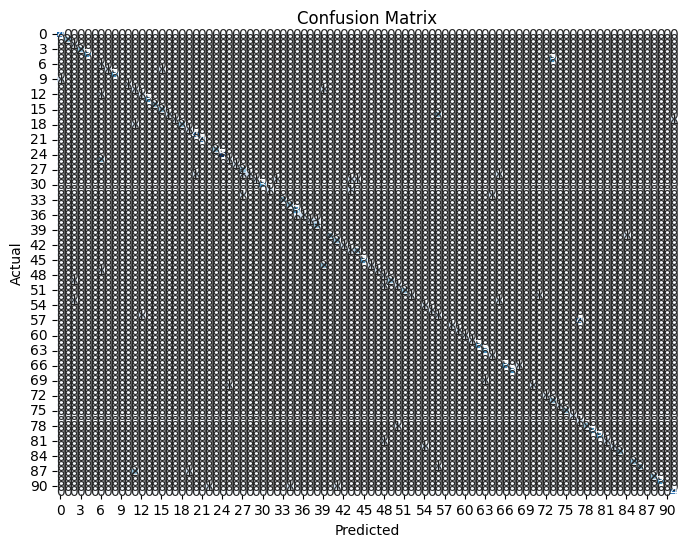

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         2
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         3
           7       0.20      1.00      0.33         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         3
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       0.25      0.50      0.33         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       0.67      1.00      0.80         2
          17       1.00      0.33      0.50         3
   

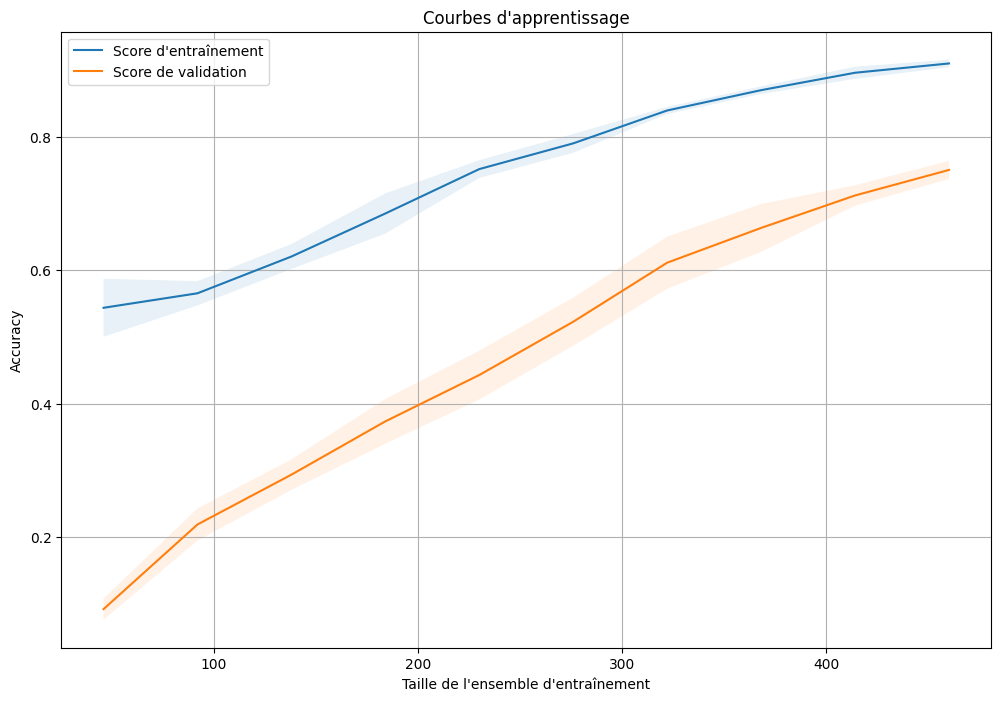

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\sit

In [4]:
evaluation_svm = Evaluation(svm_model.svm_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_svm.calculate_metrics(evaluation_svm.y_test, predictions_svm)
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_svm.plt_roc_curve()
evaluation_svm.plt_confusion_matrix()
evaluation_svm.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_svm.plot_learning_curves(train_sizes=train_sizes, scoring='accuracy')
evaluation_svm.plot_learning_curves_loss(train_sizes=train_sizes, scoring='neg_log_loss')

##### Arbre de decision

In [ ]:
Arbre_de_decision_model = Arbre_de_decision(x_train, y_train, x_val, y_val, x_test, y_test)
Arbre_de_decision_model.garder_meilleur_hyperparameters()
Arbre_de_decision_model.entrainement()
predictions = Arbre_de_decision_model.prediction()

In [ ]:
evaluation_dt = Evaluation(Arbre_de_decision_model.dt_classifier, Arbre_de_decision_model.x_test, Arbre_de_decision_model.y_test,Arbre_de_decision_model.x_train,Arbre_de_decision_model.y_train)
f1, precision, recall = evaluation_dt.calculate_metrics(Arbre_de_decision_model.y_test, Arbre_de_decision_model.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_dt.plt_roc_curve()
evaluation_dt.plt_confusion_matrix()
evaluation_dt.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_dt.plot_learning_curves(train_sizes=train_sizes, scoring='accuracy')
evaluation_dt.plot_learning_curves_loss(train_sizes=train_sizes, scoring='neg_log_loss')

##### Ada boosting


In [ ]:
adaboost_model = AdaBoost_model(x_train, y_train, x_val, y_val, x_test, y_test)
adaboost_model.validation_croisee_gridsearch()
adaboost_model.entrainement()
predictions = adaboost_model.prediction()

In [ ]:
evaluation_ab = Evaluation(adaboost_model.ab_classifier, adaboost_model.x_test, adaboost_model.y_test,adaboost_model.x_train,adaboost_model.y_train)
f1, precision, recall = evaluation_ab.calculate_metrics(adaboost_model.y_test, adaboost_model.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_ab.plt_roc_curve()
evaluation_ab.plt_confusion_matrix()
evaluation_ab.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_ab.plot_learning_curves(train_sizes=train_sizes, scoring='accuracy')

##### Reseaux de neurones


In [ ]:
model_R_N = Reseaux_de_neurones(x_train, y_train, x_val, y_val, x_test, y_test)
model_R_N.preprocess_data()
model_R_N.garder_meilleur_hyperparameters()
model_R_N.entrainement()
model_R_N.prediction()

In [ ]:
evaluation_ab = Evaluation(model_R_N.nn_classifier, model_R_N.x_test, model_R_N.y_test,model_R_N.x_train,model_R_N.y_train)
f1, precision, recall = evaluation_ab.calculate_metrics(model_R_N.y_test, model_R_N.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_ab.plt_roc_curve()
evaluation_ab.plt_confusion_matrix()
evaluation_ab.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_dt.plot_learning_curves(train_sizes=train_sizes, scoring='accuracy')

In [ ]:
print("Best hyperparameters:", model_R_N.best_hyperparameters)

##### Bagging

In [ ]:
bagging_classifier = Bagging(x_train, y_train, x_val, y_val, x_test, y_test)
bagging_classifier.garder_meilleur_hyperparameters()
bagging_classifier.entrainement()
predictions = bagging_classifier.prediction()

In [ ]:
evaluation_ab = Evaluation(model=bagging_classifier.bc_classifier, x_test=x_test, y_test=y_test, x_train=x_train, y_train=y_train)
f1, precision, recall = evaluation_ab.calculate_metrics(bagging_classifier.y_test, bagging_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_ab.plt_roc_curve()
evaluation_ab.plt_confusion_matrix
evaluation_ab.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_dt.plot_learning_curves(train_sizes=train_sizes, scoring='accuracy')


##### KNN

In [ ]:
KNN_classifier = Knn(x_train, y_train, x_val, y_val, x_test, y_test)
KNN_classifier.garder_meilleur_hyperparameters()
KNN_classifier.entrainement()
predictions = KNN_classifier.prediction()

In [ ]:
evaluation_ab = Evaluation(KNN_classifier.knn_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_ab.calculate_metrics(KNN_classifier.y_test, KNN_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_ab.plt_roc_curve()
evaluation_ab.plt_confusion_matrix()
evaluation_ab.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_dt.plot_learning_curves(train_sizes=train_sizes, scoring='accuracy')

##### Perceptron

In [ ]:
Perceptron_classifier = Perceptron_model(x_train, y_train, x_val, y_val, x_test, y_test)
Perceptron_classifier.garder_meilleur_hyperparameters()
Perceptron_classifier.entrainement()
predictions = Perceptron_classifier.prediction()

In [ ]:
evaluation_P = Evaluation(Perceptron_classifier.perceptron_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_P.calculate_metrics(Perceptron_classifier.y_test, Perceptron_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_P.plt_roc_curve()
evaluation_P.plt_confusion_matrix()
evaluation_P.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_P.plot_learning_curves(train_sizes=train_sizes, scoring='accuracy')
evaluation_P.plot_learning_curves_loss(train_sizes=train_sizes,scoring='neg_log_loss')

##### Logistic regression

In [ ]:
RL_classifier = LogisticRegression_model(x_train, y_train, x_val, y_val, x_test, y_test)
RL_classifier.garder_meilleur_hyperparameters()
RL_classifier.entrainement()
predictions = RL_classifier.prediction()

In [ ]:
evaluation_RL = Evaluation(RL_classifier.logistic_regression_classifier, x_train, y_train, x_test, y_test)
f1, precision, recall = evaluation_RL.calculate_metrics(RL_classifier.y_test, RL_classifier.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_RL.plt_roc_curve()
evaluation_RL.plt_confusion_matrix()
evaluation_RL.generate_classification_report()
train_sizes = np.linspace(0.1, 1.0, 10)
evaluation_RL.plot_learning_curves(train_sizes=train_sizes, scoring='accuracy')